In [493]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [494]:
def plot_points(X):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_aspect('equal', adjustable='box')
    ax.scatter(X[:, 0], X[:, 1], cmap='cividis')
    plt.xlabel('X1-axis')
    plt.ylabel('X2-axis')
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    return ax, fig

(4, 2)


C:\Users\84866\AppData\Local\Temp\ipykernel_9556\3934142692.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], cmap='cividis')


(<Axes: xlabel='X1-axis', ylabel='X2-axis'>, <Figure size 640x480 with 1 Axes>)

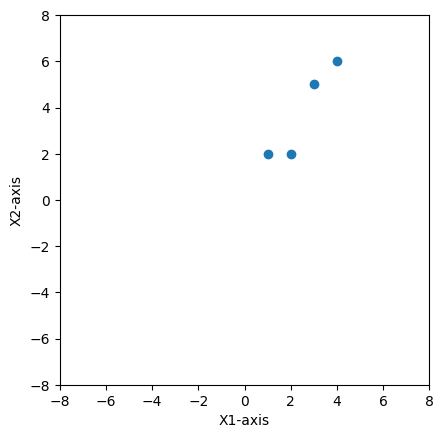

In [495]:
X = np.array([[1,2],
              [2,2],
              [3,5],
              [4,6]])
print(X.shape)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
plot_points(X)

In [496]:
t_1 = np.random.rand(4, 1)
t_1_old = t_1
t_1.shape

(4, 1)

In [497]:
p_1T = np.linalg.inv(t_1.T@t_1) @ t_1.T @ X

In [498]:
p_1T = p_1T / np.linalg.norm(p_1T)
p_1T

array([[0.56274743, 0.82662889]])

C:\Users\84866\AppData\Local\Temp\ipykernel_9556\3934142692.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], cmap='cividis')


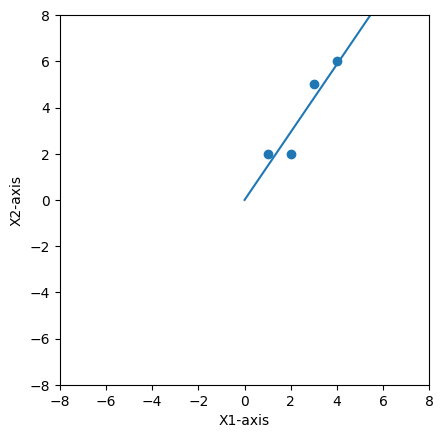

In [499]:
plot_points(X)
plt.plot([0, p_1T[0][0] * 10], [0, p_1T[0][1] * 10])
plt.show()

In [500]:
t_1 = X @ p_1T.T

In [501]:
i = 0
while (not np.array_equal(t_1_old, t_1)):
    i += 1
    print(i)
    t_1_old = t_1
    p_1T = np.linalg.inv(t_1.T@t_1) @ t_1.T @ X
    p_1T = p_1T / np.linalg.norm(p_1T)
    t_1 = X @ p_1T.T
    print(p_1T)

1
[[0.54887846 0.83590217]]
2
[[0.54881382 0.83594461]]
3
[[0.54881352 0.83594481]]
4
[[0.54881352 0.83594481]]
5
[[0.54881352 0.83594481]]
6
[[0.54881352 0.83594481]]
7
[[0.54881352 0.83594481]]


In [502]:
E = X - t_1 @ p_1T

In [503]:
t_2 = X[:, 1].reshape((-1, 1))
t_2_old = t_2
t_2.shape

(4, 1)

In [504]:
p_2T = np.linalg.inv(t_2.T@t_2) @ t_2.T @ E

In [505]:
p_2T = p_2T / np.linalg.norm(p_2T)
p_2T

array([[-0.83594481,  0.54881352]])

In [506]:
t_2 = E @ p_2T.T

C:\Users\84866\AppData\Local\Temp\ipykernel_9556\3934142692.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], cmap='cividis')


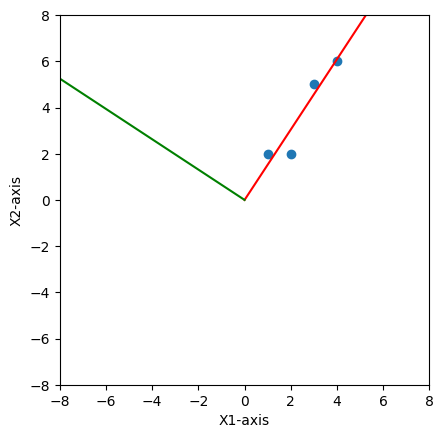

In [507]:
plot_points(X)
plt.plot([0, p_1T[0][0] * 10], [0, p_1T[0][1] * 10], c='r')
plt.plot([0, p_2T[0][0] * 10], [0, p_2T[0][1] * 10], c='g')
plt.show()

In [508]:
i = 0
while (not np.array_equal(t_2_old, t_2)):
    i += 1
    print(i)
    t_2_old = t_2
    p_2T = np.linalg.inv(t_2.T@t_2) @ t_2.T @ E
    p_2T = p_2T / np.linalg.norm(p_2T)
    t_2 = E @ p_2T.T
    print(p_2T)

1
[[-0.83594481  0.54881352]]
2
[[-0.83594481  0.54881352]]


In [509]:
pca = PCA(2)
pca.fit(X)
pca.components_

array([[ 0.52008651,  0.85411359],
       [ 0.85411359, -0.52008651]])